## 0208

In [ ]:
import pandas as pd
import re

data = "dbpedia_14"
text_len = 60
model = "transformeral"
layer = 5
epoch = 10
lr = 0.0001
fix_previous_layer = True
#for mask in range(1,1+layer):
mask = 5
save_path = f"ckpt/{data}_{model}_l{layer}_pad{text_len}_m{mask}/"  
#load_path = f"ckpt/{data}_{model}_l{layer}_pad{text_len}_m{mask-1}/" 
out_path = f"result/0117/fix train adapt/{data}_{model}_l{layer}ad_pad{text_len}_m{mask}/"
log = f"{out_path}/{data}_{model}_l{layer}.log"

with open(log,mode='r') as log:
    buffer = log.readlines()
    df = pd.DataFrame(buffer,columns=["log"])
    df

In [ ]:
class history(object):
    def __init__(self):
        self.auc = {}
        self.acc = {}
        self.entr = {}
        for threshold in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
            self.auc[threshold] = []
            self.acc[threshold] = []
            self.entr[threshold] = []
            
result = history()
for line in buffer:
    match = re.match('Test Epoch(.)*', line)
    if match!=None:
        print(match.group())
        match = re.findall("\d?\.\d+",match.group(0))
        print(match)
        threshold = float(match[0])
        result.acc[threshold].append(match[1])
        result.auc[threshold].append(match[2])
        result.entr[threshold].append(match[3])

In [ ]:
for threshold in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print(len(result.acc[threshold]))
    print(len(result.auc[threshold]))
    print(len(result.entr[threshold]))

In [ ]:
### 2/06 - valid/test 80%:20%
###      - prefix
###      - plot result

import pandas as pd
import re

data = "ag_news"
text_len = 175


for model in ["linearal","lstmal","transformeral"]:
    result = [[] for _ in range(4)]
    for threshold in [.1,.2,.3,.4,.5,.6,.7,.8,.9]:

        layer = 5
        epoch = 10
        lr = 0.0001
        fix_previous_layer = False
        
        mask = 5
        out_path = f"result/0208/test/prefix/{data}_{model}_l{layer}adp_pad{text_len}_t{threshold}_m{mask}_test/"
        log = f"{out_path}/{data}_{model}_l{layer}.log"
            
        with open(log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                match = re.match('Test threshold(.)*', line)
                if match!=None:
                    match = re.findall("\d?\.\d+",match.group(0))
                    #print(match[1])
                    result[0].append(float(match[1]))
                    result[1].append(float(match[2]))
                    result[2].append(float(match[3]))
            for line in buffer:
                match = re.match('t(.)*_test_time(.)*', line)
                if match!=None:
                    match = re.findall("\d?\.\d+",match.group(0))
                    #print(match[1])
                    result[3].append(float(match[1]))
    print("\n",model)
    for i in range(4):
        print(i)
        for v in result[i]:
            print(v)                    

                    

In [ ]:
### 2/06 - valid/test 80%:20%
###      - fix
###      - plot result

import pandas as pd
import re

data = "ag_news"
text_len = 175

for model in ["linearal","lstmal","transformeral"]:
    result = [[] for _ in range(4)]
    for threshold in [.1,.2,.3,.4,.5,.6,.7,.8,.9]:

        layer = 5
        epoch = 10
        lr = 0.0001
        fix_previous_layer = False
        
        mask = 5
        out_path = f"result/0208/test/fix/{data}_{model}_l{layer}adf_pad{text_len}_t{threshold}_m{mask}_test/"
        log = f"{out_path}/{data}_{model}_l{layer}.log"
            
        with open(log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                match = re.match('Test threshold(.)*', line)
                if match!=None:
                    match = re.findall("\d?\.\d+",match.group(0))
                    #print(match[1])
                    result[0].append(float(match[1]))
                    result[1].append(float(match[2]))
                    result[2].append(float(match[3]))
            for line in buffer:
                match = re.match('t(.)*_test_time(.)*', line)
                if match!=None:
                    match = re.findall("\d?\.\d+",match.group(0))
                    #print(match[1])
                    result[3].append(float(match[1]))
    print("\n",model)
    for i in range(4):
        print(i)
        for v in result[i]:
            print(v)                    

                    

## 0214


### base adapt

In [ ]:
### 0214
### pad base adapt 
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt




#for model in ["lstmal"]:
for model in ["lstmal","linearal","transformeral"]:
    total_result = pd.DataFrame(columns=['padding_size', 'model', 'test_threshold', 'test_acc', 'test_auc',
                                        'test_avg_entr', 'test_time'])
    #data = "ag_news"
    #for text_len in [25,50,75,100,125,150,175]:
    data = "dbpedia_14"
    for text_len in [20,40,60]:
        layer = 5
        epoch = 50
        lr = 0.0001
        save_path = f"ckpt/{data}_{model}_l{layer}ad_pad{text_len}/"
        #out_path = f"result/0220/ag_news/base adapt/{data}_{model}_l{layer}ad_pad{text_len}/"
        out_path = f"result/0220/dbpedia_14/base adapt/{data}_{model}_l{layer}ad_pad{text_len}/"
        "result/0220/dbpedia/base adapt/dbpedia_14_linearal_l5ad_pad20/dbpedia_14_linearal_l5.log"
        log = f"{out_path}/{data}_{model}_l{layer}.log"
        
        result = pd.DataFrame(columns=["padding_size"])
        result_ep = pd.DataFrame(columns=["epoch","ep_train_time"])
        result_ep["epoch"] = [*range(epoch)]
        list_acc = []
        list_auc = []
        list_entr = []
        list_test_time = []
        list_ep_train_time = []
        list_ep_train_acc = []
        list_ep_train_auc = []
        list_ep_train_entr = []
        list_ep_valid_time = []
        list_ep_valid_acc = []
        list_ep_valid_auc = []
        list_ep_valid_entr = []
        train_time = 0
        init_time = 0
        best_ep = -1
        best_th = []
        save_th = []
        with open(log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                
                
                match = re.match('Save ckpt to (.)*', line)
                if match!=None:
                    match = re.findall("ep \d+",match.group(0))
                    best_ep = match[0]
                    best_th.append(current_th)
                match = re.match('Test threshold(.)*', line)
                if match!=None:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc.append(float(match[1]))
                    list_auc.append(float(match[2]))
                    list_entr.append(float(match[3]))
                    

                match = re.match('t(.)*_test_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time.append(float(match[1]))

                match = re.match('init_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    init_time = float(match[0])
                match = re.match('(.)*valid_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    train_time = float(match[0])
                    
                match = re.match('ep(\d)+_train_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_time.append(float(match[0]))
                    
                match = re.match('ep(\d)+_t(.)*_test_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_valid_time.append(float(match[1]))
                    
                match = re.match('Train Epoch\d+ Acc(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_acc.append(float(match[0]))
                    list_ep_train_auc.append(float(match[1]))
                    #print(best_th)
                    if len(best_th)>0:
                        save_th = best_th
                    best_th = []
                    
                match = re.match('Test Epoch\d+ threshold(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    #print(line)
                    #print(match)
                    current_th = int(float(match[0])*10)
                    list_ep_valid_acc.append(float(match[1]))
                    list_ep_valid_auc.append(float(match[2]))
                    list_ep_valid_entr.append(float(match[3]))
        print(save_th)    
        ep_valid_time = np.array(list_ep_valid_time).reshape((epoch,-1))
        ep_valid_acc = np.array(list_ep_valid_acc).reshape((epoch,-1))
        ep_valid_auc = np.array(list_ep_valid_auc).reshape((epoch,-1))
        ep_valid_entr = np.array(list_ep_valid_entr).reshape((epoch,-1))
        
        result_ep["ep_train_acc"] = list_ep_train_acc 
        result_ep["ep_train_auc"] = list_ep_train_auc          
        
        result_ep["ep_valid_time"] = np.sum(ep_valid_time,-1) 
        result_ep[[f"ep_valid.{(i+1)}_time" for i in range(9)]] = ep_valid_time
        result_ep["ep_train_time"] = list_ep_train_time 
        
        para_size = 9
        result['model'] = [model]*para_size
        result['padding_size'] = [text_len]*para_size
        result["test_threshold"] = [(1+i)*0.1 for i in range(para_size)]
        result["best_ep"] = [best_ep[2:]]*para_size
        result["best_th"] = [save_th]*para_size
        result["best_acc_setting"] = [list_acc[save_th[-1]-1]]*para_size
        result["best_auc_setting"] = [list_auc[save_th[-1]-1]]*para_size
        result["test_acc"] = list_acc
        result["test_auc"] = list_auc
        result["test_avg_entr"] = list_entr
        result["test_time"] = list_test_time
        result["init_time"] = [init_time]*para_size
        result["train+valid_time"] = [train_time]*para_size
        result["train_time"] = [result_ep["ep_train_time"].sum()]*para_size
        result["valid_time"] = [result_ep["ep_valid_time"].sum()]*para_size
        #print(result)
        #print(result_ep)

        path = f"result/_csv/{data}/base_ad/"
        title = f"{data}_{model}_l{layer}ad_pad{text_len}({best_ep})"
        os.makedirs(path,exist_ok=True)
        """
        t = [0.1*(i+1) for i in range(9)]
        plt.title(title)
        plt.plot(t,result["test_time"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test time")
        plt.savefig(f"{path}/{title}_plt_test_time.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_acc"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test acc")
        for i in range(9):
            if (i+1) in save_th:
                plt.plot((i+1)/10,result["test_acc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_acc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()

        plt.title(title)
        plt.plot(t,result["test_auc"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test auc")
        for i in range(9):
            if (i+1) in save_th:
                plt.plot((i+1)/10,result["test_auc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_auc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_avg_entr"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test avg entr")
        plt.savefig(f"{path}/{title}_plt_entr.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        """
        #result.to_csv(f"{path}/{title}.csv", index=False)
        #result_ep.to_csv(f"{path}/{title}_ep.csv", index=False)
        total_result = pd.concat([total_result,result],axis=0,ignore_index=True)            
        del result

    title = f"{data}_{model}_l{layer}ad"
    total_result.to_csv(f"{path}/{title}.csv", index=False)
    

In [ ]:
total_result

### base shortcut

In [ ]:
### 0214
### pad base sc
### 0220 - ag_news/dbpedia_14 
###      - testing log有誤 "Test Epoch49 layer(.)*"
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

for model in ["lstmal","linearal","transformeral"]:
    total_result = pd.DataFrame(columns=['padding_size', 'model', 'test_acc', 'test_auc',
                                        'test_time'])
    #data = "ag_news"
    #for text_len in [25,50,75,100,125,150,175]:
    #data = "dbpedia_14"
    #for text_len in [20,40,60]:
    data = "imdb"
    for text_len in [100,200,300,400,500]:    
        layer = 5
        epoch = 50
        lr = 0.0001
        save_path = f"ckpt/{data}_{model}_l{layer}_pad{text_len}/"
        #out_path = f"result/0220/ag_news/base sc/{data}_{model}_l{layer}_pad{text_len}/"
        #out_path = f"result/0220/dbpedia/base sc/{data}_{model}_l{layer}_pad{text_len}/"
        out_path = f"result/0220/imdb/base sc/{data}_{model}_l{layer}_pad{text_len}/"
        log = f"{out_path}/{data}_{model}_l{layer}.log"
        
        result = pd.DataFrame(columns=["padding_size"])
        result_ep = pd.DataFrame(columns=["epoch","ep_train_time"])
        result_ep["epoch"] = [*range(epoch)]
        list_acc = []
        list_auc = []
        list_entr = []
        list_test_time = []
        list_ep_train_time = []
        list_ep_train_acc = []
        list_ep_train_auc = []
        list_ep_train_entr = []
        list_ep_valid_time = []
        list_ep_valid_acc = []
        list_ep_valid_auc = []
        list_ep_valid_entr = []
        train_time = 0
        init_time = 0
        best_ep = -1
        best_th = []
        save_th = []
        test_part = False
        
        para_size = 5
        with open(log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                
                
                match = re.match("Start Testing", line)
                if match!=None:
                    test_part = True
                    
                match = re.match('Save ckpt to (.)*', line)
                if match!=None:
                    match = re.findall("ep \d+",match.group(0))
                    best_ep = match[0]
                    best_th.append(current_th)
                
                if data == "imdb":
                    match = re.match('Test layer\d+(.)*', line)    
                else:    
                    match = re.match('Test Epoch49 layer(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc.append(float(match[0]))
                    list_auc.append(float(match[1]))
                    list_entr.append(float(match[2]))
                    
                if data == "imdb":
                    match = re.match('l\d+_test_time(.)*', line)
                else:    
                    match = re.match('ep49_l\d_test_time(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time.append(float(match[0]))

                match = re.match('init_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    init_time = float(match[0])
                    
                match = re.match('(.)*valid_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    train_time = float(match[0])
                    
                match = re.match('ep(\d)+_train_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_time.append(float(match[0]))
                    
                match = re.match('ep(\d)+_l\d+_test_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_valid_time.append(float(match[0]))
                    
                match = re.match('Train Epoch\d+ Acc(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_acc.append(float(match[0]))
                    list_ep_train_auc.append(float(match[1]))
                    #print(best_th)
                    if len(best_th)>0:
                        save_th = best_th
                    best_th = []
                    
                match = re.match('Test Epoch\d+ layer(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    #print(line)
                    #print(match)
                    
                    list_ep_valid_acc.append(float(match[0]))
                    list_ep_valid_auc.append(float(match[1]))
                    list_ep_valid_entr.append(float(match[2]))
                    
                    match = re.findall('\d+', line)
                    current_th = int(match[1])
        print(save_th)    
        ep_valid_time = np.array(list_ep_valid_time).reshape((epoch,-1))
        ep_valid_acc = np.array(list_ep_valid_acc).reshape((epoch,-1))
        ep_valid_auc = np.array(list_ep_valid_auc).reshape((epoch,-1))
        ep_valid_entr = np.array(list_ep_valid_entr).reshape((epoch,-1))
        
        result_ep["ep_train_acc"] = list_ep_train_acc 
        result_ep["ep_train_auc"] = list_ep_train_auc          
        
        result_ep["ep_valid_time"] = np.sum(ep_valid_time,-1) 
        result_ep[[f"ep_valid_l{i}_time" for i in range(para_size)]] = ep_valid_time
        result_ep["ep_train_time"] = list_ep_train_time 
        
        
        result['model'] = [model]*para_size
        result['padding_size'] = [text_len]*para_size
        result["test_layer"] = [(i) for i in range(para_size)]
        result["best_ep"] = [best_ep[2:]]*para_size
        result["best_th"] = [save_th]*para_size
        result["best_acc_setting"] = [list_acc[save_th[-1]-1]]*para_size
        result["best_auc_setting"] = [list_auc[save_th[-1]-1]]*para_size
        result["test_acc"] = list_acc
        result["test_auc"] = list_auc
        result["test_avg_entr"] = list_entr
        result["test_time"] = list_test_time
        result["init_time"] = [init_time]*para_size
        result["train+valid_time"] = [train_time]*para_size
        result["train_time"] = [result_ep["ep_train_time"].sum()]*para_size
        result["valid_time"] = [result_ep["ep_valid_time"].sum()]*para_size
        #print(result)
        #print(result_ep)

        path = f"result/_csv/{data}/base_sc/"
        title = f"{data}_{model}_l{layer}_pad{text_len}({best_ep})"
        t = [(i) for i in range(para_size)]
        
        os.makedirs(path,exist_ok=True)

        """
        plt.title(title)
        plt.plot(t,result["test_time"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test time")
        plt.savefig(f"{path}/{title}_plt_test_time.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_acc"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test acc")
        for i in range(para_size):
            if (i) == save_th[-1]:
                plt.plot((i),result["test_acc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_acc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()

        plt.title(title)
        plt.plot(t,result["test_auc"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test auc")
        for i in range(para_size):
            if (i) == save_th[-1]:
                plt.plot((i),result["test_auc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_auc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_avg_entr"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test avg entr")
        plt.savefig(f"{path}/{title}_plt_entr.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        """
        #result.to_csv(f"{path}/{title}.csv", index=False)
        #result_ep.to_csv(f"{path}/{title}_ep.csv", index=False)
        total_result = pd.concat([total_result,result],axis=0,ignore_index=True)            
        del result
    
    title = f"{data}_{model}_l{layer}"
    total_result.to_csv(f"{path}/{title}.csv", index=False)
        

### fix/prefix adapt

In [ ]:
data = "ag_news"
for model in ["lstmal","linearal","transformeral"]:
    total_result = pd.DataFrame(columns=[])
    for threshold in [.1,.2,.3,.4,.5,.6,.7,.8,.9]:
        for text_len in [175]:
            layer = 5
            epoch = 10
            lr = 0.0001
            
            result = pd.DataFrame(columns=["padding_size"])
            result_ep = pd.DataFrame(columns=["epoch","ep_train_time"])
            result_ep["epoch"] = [*range(epoch)]
            list_acc = []
            list_auc = []
            list_entr = []
            list_test_time = []
            list_init_time = []
            list_train_time = []
            
            for mask in range(1,1+layer):
                save_path = f"ckpt/{data}_{model}_l{layer}adf_pad{text_len}_t{threshold}_m{mask}/"  
                load_path = f"ckpt/{data}_{model}_l{layer}adf_pad{text_len}_t{threshold}_m{mask-1}/" 
                #out_path = f"result/0220/ag_news/fix adapt/{data}_{model}_l{layer}adf_pad{text_len}_t{threshold}_m{mask}/"
                out_path = f"result/0214/prefix adapt/{data}_{model}_l{layer}adf_pad{text_len}_t{threshold}_m{mask}/"
                log = f"{out_path}/{data}_{model}_l{layer}.log"
                
                with open(log,mode='r') as log:
                    buffer = log.readlines()
                    df = pd.DataFrame(buffer,columns=["log"])
                    df
                    
                    
                    for line in buffer:
                        match = re.match('Test threshold(.)*', line)
                        if match!=None:
                            match = re.findall("\d?\.\d+",match.group(0))
                            list_acc.append(float(match[1]))
                            list_auc.append(float(match[2]))
                            list_entr.append(float(match[3]))

                        match = re.match('t(.)*_test_time(.)*', line)
                        if match!=None:
                            match = re.findall("\d+\.\d+",match.group(0))
                            list_test_time.append(float(match[1]))
                        match = re.match('init_time(.)*', line)
                        if match!=None:
                            match = re.findall("\d+\.\d+",match.group(0))
                            list_init_time.append(float(match[0]))
                        match = re.match('(.)*valid_time(.)*', line)
                        if match!=None:
                            match = re.findall("\d+\.\d+",match.group(0))
                            list_train_time.append(float(match[0]))
                                
            result['threshold'] = [threshold]*5
            result['model'] = [model]*5
            result['padding_size'] = [text_len]*5
            result["train_mask"] = [(1+i) for i in range(5)]
            
            result["test_acc"] = list_acc
            result["test_auc"] = list_auc
            result["test_avg_entr"] = list_entr
            
            result["init_time"] = list_init_time
            result["test_time"] = list_test_time
            result["train+valid_time"] = list_train_time
        
            #print(result)
            total_result = pd.concat([total_result,result],axis=0,ignore_index=True)
    
    table = total_result[total_result["train_mask"]==5]
    #title = f"{data}_{model}_l{layer}f_pad{text_len}"
    title = f"{data}_{model}_l{layer}p_pad{text_len}"
    path = f"result/_csv/{data}"
                   
    print(total_result)
    total_result.to_csv(f"{path}/{title}.csv", index=False)
    
    plt.title(title)
    plt.plot(t,table["test_acc"],"o-") 
    plt.xlabel("threshold")
    plt.ylabel("test acc")
    plt.savefig(f"{path}/{title}_plt_acc.png", bbox_inches = "tight",facecolor='white', transparent=False)
    plt.show()
    
    plt.title(title)
    plt.plot(t,table["test_auc"],"o-") 
    plt.xlabel("threshold")
    plt.ylabel("test auc")
    plt.savefig(f"{path}/{title}_plt_auc.png", bbox_inches = "tight",facecolor='white', transparent=False)
    plt.show()
    
    plt.title(title)
    plt.plot(t,table["test_time"],"o-") 
    plt.xlabel("threshold")
    plt.ylabel("test time")
    plt.savefig(f"{path}/{title}_plt_test_time.png", bbox_inches = "tight",facecolor='white', transparent=False)
    plt.show()
    
    plt.title(title)
    plt.plot(t,table["test_avg_entr"],"o-") 
    plt.xlabel("threshold")
    plt.ylabel("test avg entr")
    plt.savefig(f"{path}/{title}_plt_entr.png", bbox_inches = "tight",facecolor='white', transparent=False)
    plt.show()
    #break
            

### base fullpath

In [ ]:
### fullpath baseline
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
### 2/22 - baseline: valid/test with fullpath
data = "ag_news"
total_result = pd.DataFrame(columns=[])
for model in ["linearal","lstmal","transformeral"]:
    for text_len in [25,50,75,100,125,150,175]:
### 2/26 - dbpedia
#data = "dbpedia_14"
#for text_len in [20,40,60]:
### 2/28 - imdb 8:1:1
#data = "imdb"
#for text_len in [100,200,300,400,500]:
    
        
        layer = 5
        epoch = 50
        lr = 0.0001
        save_path = f"ckpt/{data}_{model}_l{layer}base_pad{text_len}/"
        out_path = f"result/0227/{data}_{model}_l{layer}base_pad{text_len}/"
        log = f"{out_path}/{data}_{model}_l{layer}base.log"
        
        
        result = pd.DataFrame(columns=["padding_size"])
        result_ep = pd.DataFrame(columns=["epoch","ep_train_time"])
        result_ep["epoch"] = [*range(epoch)]
        list_acc = []
        list_auc = []
        list_entr = []
        list_test_time = []
        list_ep_train_time = []
        list_ep_train_acc = []
        list_ep_train_auc = []
        list_ep_train_entr = []
        list_ep_valid_time = []
        list_ep_valid_acc = []
        list_ep_valid_auc = []
        list_ep_valid_entr = []
        train_time = 0
        init_time = 0
        best_ep = -1
        best_th = []
        save_th = []
        test_part = False
        
        para_size = 1
        with open(log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                
                
                match = re.match("Start Testing", line)
                if match!=None:
                    test_part = True
                    
                match = re.match('Save ckpt to (.)*', line)
                if match!=None:
                    match = re.findall("ep \d+",match.group(0))
                    best_ep = match[0]
                    best_th.append(current_th)
                    
                match = re.match('Test layer\d Acc(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc.append(float(match[0]))
                    list_auc.append(float(match[1]))
                    list_entr.append(float(match[2]))
                    

                match = re.match('Test layer\d Acc(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time.append(float(match[0]))

                match = re.match('init_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    init_time = float(match[0])
                    
                match = re.match('(.)*valid_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    train_time = float(match[0])
                    
                match = re.match('ep(\d)+_train_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_time.append(float(match[0]))
                    
                match = re.match('ep(\d)+_l\d+_test_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_valid_time.append(float(match[0]))
                    
                match = re.match('Train Epoch\d+ Acc(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_acc.append(float(match[0]))
                    list_ep_train_auc.append(float(match[1]))
                    #print(best_th)
                    if len(best_th)>0:
                        save_th = best_th
                    best_th = []
                    
                match = re.match('Test Epoch\d+ layer(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    #print(line)
                    #print(match)
                    
                    list_ep_valid_acc.append(float(match[0]))
                    list_ep_valid_auc.append(float(match[1]))
                    list_ep_valid_entr.append(float(match[2]))
                    
                    match = re.findall('\d+', line)
                    current_th = int(match[1])
        print(save_th)    
        ep_valid_time = np.array(list_ep_valid_time).reshape((epoch,-1))
        ep_valid_acc = np.array(list_ep_valid_acc).reshape((epoch,-1))
        ep_valid_auc = np.array(list_ep_valid_auc).reshape((epoch,-1))
        ep_valid_entr = np.array(list_ep_valid_entr).reshape((epoch,-1))
        
        result_ep["ep_train_acc"] = list_ep_train_acc 
        result_ep["ep_train_auc"] = list_ep_train_auc          
        
        result_ep["ep_valid_time"] = np.sum(ep_valid_time,-1) 
        result_ep[[f"ep_valid_l{i}_time" for i in range(para_size)]] = ep_valid_time
        result_ep["ep_train_time"] = list_ep_train_time 
        
        
        result['model'] = [model]*para_size
        result['padding_size'] = [text_len]*para_size
        result["test_layer"] = [(i) for i in range(para_size)]
        result["test_acc"] = list_acc
        result["test_auc"] = list_auc
        result["test_avg_entr"] = list_entr
        result["test_time"] = list_test_time
        result["init_time"] = [init_time]*para_size
        result["train+valid_time"] = [train_time]*para_size
        result["train_time"] = [result_ep["ep_train_time"].sum()]*para_size
        result["valid_time"] = [result_ep["ep_valid_time"].sum()]*para_size
        result['best_ep'] = best_ep
        #print(result)
        #print(result_ep)
        """
        path = f"result/_csv/{data}"
        title = f"{data}_{model}_l{layer}_pad{text_len}({best_ep})"
        t = [(i) for i in range(para_size)]
        try:
            os.mkdir(path)
        except:
            pass 
        
        plt.title(title)
        plt.plot(t,result["test_time"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test time")
        plt.savefig(f"{path}/{title}_plt_test_time.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_acc"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test acc")
        for i in range(para_size):
            if (i) == save_th[-1]:
                plt.plot((i),result["test_acc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_acc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()

        plt.title(title)
        plt.plot(t,result["test_auc"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test auc")
        for i in range(para_size):
            if (i) == save_th[-1]:
                plt.plot((i),result["test_auc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_auc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_avg_entr"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test avg entr")
        plt.savefig(f"{path}/{title}_plt_entr.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        """
        #result.to_csv(f"{path}/{title}.csv", index=False)
        #result_ep.to_csv(f"{path}/{title}_ep.csv", index=False)
        total_result = pd.concat([total_result,result],axis=0,ignore_index=True)            
        del result
    path = f"result/_csv/{data}"
    title = f"{data}_{model}_l{layer}base"
    total_result.to_csv(f"{path}/{title}_ep.csv", index=False)
    

## 0308


### fullpath baseline 多次

In [ ]:
### fullpath baseline
### 2/22 - baseline: valid/test with fullpath
### 2/26 - dbpedia
### 2/28 - imdb 8:1:1
### 3/08 - read more files
### 3/20 - fullpath training now do shortcut/adaptive inference

In [ ]:
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

total_result = pd.DataFrame(columns=[])

#data = "ag_news"
#for text_len in [25,50,75,100,125,150,175]:

#data = "dbpedia_14"
#for text_len in [20,40,60]:

data = "imdb"
#for text_len in [100,200,300,400,500]:
#for test_count in range(5):
text_len = 500
#text_len = 80
#text_len = 177
for model in ["linearal","lstmal","transformeral"]:
    layer = 5
    epoch = 20
    lr = 0.0001
    out_path = f"result/0318/fullpath+sc_ad/{data}_{model}_l{layer}base512_pad{text_len}/"

    log_list = os.listdir(out_path)
    print(log_list)
    for log in log_list:
        
        result = pd.DataFrame(columns=["padding_size"])
        result_ep = pd.DataFrame(columns=["epoch","ep_train_time"])
        result_ep["epoch"] = [*range(epoch)]
        list_acc = []
        list_auc = []
        list_f1 = []
        list_entr = []
        list_acc_th = []
        list_auc_th = []
        list_f1_th = []
        list_entr_th = []
        list_test_time = []
        list_test_time_th = []
        list_ep_train_time = []
        list_ep_train_acc = []
        list_ep_train_auc = []
        list_ep_train_entr = []
        list_ep_valid_time = []
        list_ep_valid_acc = []
        list_ep_valid_auc = []
        list_ep_valid_entr = []
        list_ep_valid_f1 = []
        train_time = 0
        init_time = 0
        best_ep = -1
        best_th = []
        save_th = []
        test_part = False
        
        #para_size = 1
        para_size = 5+9
        with open(out_path+log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                
                
                match = re.match("Start Testing", line)
                if match!=None:
                    test_part = True
                    
                match = re.match('Save ckpt to (.)*', line)
                if match!=None:
                    match = re.findall("ep \d+",match.group(0))
                    best_ep = match[0]
                    best_th.append(current_th)

                match = re.match('init_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    init_time = float(match[0])
                    
                match = re.match('(.)*valid_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    train_time = float(match[0])
                    
                match = re.match('ep(\d)+_train_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_time.append(float(match[0]))
                    
                match = re.match('ep(\d)+_l\d+_test_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_valid_time.append(float(match[0]))
                    
                match = re.match('Train Epoch\d+ Acc(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_acc.append(float(match[0]))
                    list_ep_train_auc.append(float(match[1]))
                    #print(best_th)
                    if len(best_th)>0:
                        save_th = best_th
                    best_th = []
                    
                match = re.match('Test Epoch\d+ layer(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    #print(line)
                    #print(match)
                    
                    list_ep_valid_acc.append(float(match[0]))
                    list_ep_valid_auc.append(float(match[1]))
                    list_ep_valid_entr.append(float(match[2]))
                    list_ep_valid_f1.append(float(match[3]))
                    
                    match = re.findall('\d+', line)
                    current_th = int(match[1])
                
                ### testing part
                match = re.match('Test layer\d Acc(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc.append(float(match[0]))
                    list_auc.append(float(match[1]))
                    list_entr.append(float(match[2]))
                    list_f1.append(float(match[3]))
                    
                match = re.match('l\d+_test_time(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time.append(float(match[0]))
                
                match = re.match('Test threshold(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc_th.append(float(match[1]))
                    list_auc_th.append(float(match[2]))
                    list_entr_th.append(float(match[3]))
                    list_f1_th.append(float(match[4]))
                    
                match = re.match('t(.)*_test_time(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time_th.append(float(match[1]))
        print(save_th)    
        ep_valid_time = np.array(list_ep_valid_time).reshape((epoch,-1))
        ep_valid_acc = np.array(list_ep_valid_acc).reshape((epoch,-1))
        ep_valid_auc = np.array(list_ep_valid_auc).reshape((epoch,-1))
        ep_valid_entr = np.array(list_ep_valid_entr).reshape((epoch,-1))
        ep_valid_f1 = np.array(list_ep_valid_entr).reshape((epoch,-1))
        
        result_ep["ep_train_acc"] = list_ep_train_acc 
        result_ep["ep_train_auc"] = list_ep_train_auc          
        result_ep["ep_valid_time"] = np.sum(ep_valid_time,-1) 
        result_ep["ep_valid_l4_time"] = ep_valid_time
        result_ep["ep_train_time"] = list_ep_train_time 
        
        
        result['model'] = [model]*para_size
        result['padding_size'] = [text_len]*para_size
        #result["test_layer"] = [(i) for i in range(para_size)]
        result["test_setting"] = [i for i in range(5)]+[0.1*(i+1) for i in range(9)]
        result["test_acc"] = list_acc + list_acc_th
        result["test_auc"] = list_auc + list_auc_th
        result["test_f1"] = list_f1 + list_f1_th
        result["test_avg_entr"] = list_entr + list_entr_th
        result["test_time"] = list_test_time + list_test_time_th
        result["init_time"] = [init_time]*para_size
        result["train+valid_time"] = [train_time]*para_size
        result["train_time"] = [result_ep["ep_train_time"].sum()]*para_size
        result["valid_time"] = [result_ep["ep_valid_time"].sum()]*para_size
        result['best_ep'] = best_ep[3:]
        #print(result)
        #print(result_ep)
        """
        path = f"result/_csv/{data}"
        title = f"{data}_{model}_l{layer}_pad{text_len}({best_ep})"
        t = [(i) for i in range(para_size)]
        try:
            os.mkdir(path)
        except:
            pass 
        
        plt.title(title)
        plt.plot(t,result["test_time"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test time")
        plt.savefig(f"{path}/{title}_plt_test_time.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_acc"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test acc")
        for i in range(para_size):
            if (i) == save_th[-1]:
                plt.plot((i),result["test_acc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_acc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()

        plt.title(title)
        plt.plot(t,result["test_auc"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test auc")
        for i in range(para_size):
            if (i) == save_th[-1]:
                plt.plot((i),result["test_auc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_auc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_avg_entr"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test avg entr")
        plt.savefig(f"{path}/{title}_plt_entr.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        """
        #result.to_csv(f"{path}/{title}.csv", index=False)
        #result_ep.to_csv(f"{path}/{title}_ep.csv", index=False)
        total_result = pd.concat([total_result,result],axis=0,ignore_index=True)            
        del result
path = f"result/_csv/{data}"
os.makedirs(path, exist_ok=True)
title = f"{data}_l{layer}base_512"
total_result.to_csv(f"{path}/{title}.csv", index=False)
    


### adapt 多次

In [ ]:
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
total_result = pd.DataFrame(columns=[])

### 2/04 - valid/test 80%:20%
###      - save_path unique for test load
###      - "lstmal","linearal","transformeral" adapt valid pad save best auc
### 2/08 - valid/test 50%:50%
#data = "ag_news"
#for text_len in [25,50,75,100,125,150,175]:
#for text_len in [50,75,100,125,150,175]:
### 2/18 - dbpedia
#data = "dbpedia_14"
#for text_len in [20,40,60]:
data = "imdb"

text_len = 500
#text_len = 177
for model in ["lstmal","linearal","transformeral"]:
    layer = 5
    epoch = 30
    lr = 0.0001
    save_path = f"ckpt/{data}_{model}_l{layer}ad_pad{text_len}/"
    out_path = f"result/0315/timer fixed/imdb/{data}_{model}_l{layer}ad_pad{text_len}/"
    log_list = os.listdir(out_path)
    print(log_list)
    for log in log_list:
        
        result = pd.DataFrame(columns=["padding_size"])
        result_ep = pd.DataFrame(columns=["epoch","ep_train_time"])
        result_ep["epoch"] = [*range(epoch)]
        list_acc = []
        list_auc = []
        list_entr = []
        list_f1 = []
        list_test_time = []
        list_ep_train_time = []
        list_ep_train_acc = []
        list_ep_train_auc = []
        list_ep_train_entr = []
        list_ep_valid_time = []
        list_ep_valid_acc = []
        list_ep_valid_auc = []
        list_ep_valid_entr = []
        train_time = 0
        init_time = 0
        best_ep = -1
        best_th = []
        save_th = []
        with open(out_path+log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                
                
                match = re.match('Save ckpt to (.)*', line)
                if match!=None:
                    match = re.findall("ep \d+",match.group(0))
                    best_ep = match[0]
                    best_th.append(current_th)
                match = re.match('Test threshold(.)*', line)
                if match!=None:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc.append(float(match[1]))
                    list_auc.append(float(match[2]))
                    list_entr.append(float(match[3]))
                    list_f1.append(float(match[4]))
                    

                match = re.match('t(.)*_test_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time.append(float(match[1]))

                match = re.match('init_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    init_time = float(match[0])
                match = re.match('(.)*valid_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    train_time = float(match[0])
                    
                match = re.match('ep(\d)+_train_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_time.append(float(match[0]))
                    
                match = re.match('ep(\d)+_t(.)*_test_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_valid_time.append(float(match[1]))
                    
                match = re.match('Train Epoch\d+ Acc(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_acc.append(float(match[0]))
                    list_ep_train_auc.append(float(match[1]))
                    #print(best_th)
                    if len(best_th)>0:
                        save_th = best_th
                    best_th = []
                    
                match = re.match('Test Epoch\d+ threshold(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    #print(line)
                    #print(match)
                    current_th = int(float(match[0])*10)
                    list_ep_valid_acc.append(float(match[1]))
                    list_ep_valid_auc.append(float(match[2]))
                    list_ep_valid_entr.append(float(match[3]))
        print(save_th)    
        ep_valid_time = np.array(list_ep_valid_time).reshape((epoch,-1))
        ep_valid_acc = np.array(list_ep_valid_acc).reshape((epoch,-1))
        ep_valid_auc = np.array(list_ep_valid_auc).reshape((epoch,-1))
        ep_valid_entr = np.array(list_ep_valid_entr).reshape((epoch,-1))
        
        result_ep["ep_train_acc"] = list_ep_train_acc 
        result_ep["ep_train_auc"] = list_ep_train_auc          
        
        result_ep["ep_valid_time"] = np.sum(ep_valid_time,-1) 
        result_ep[[f"ep_valid.{(i+1)}_time" for i in range(9)]] = ep_valid_time
        result_ep["ep_train_time"] = list_ep_train_time 
        
        para_size = 9
        result['model'] = [model]*para_size
        result['padding_size'] = [text_len]*para_size
        result["test_threshold"] = [(1+i)*0.1 for i in range(para_size)]
        result["best_ep"] = [best_ep[2:]]*para_size
        result["best_th"] = [save_th]*para_size
        result["best_acc_setting"] = [list_acc[save_th[-1]-1]]*para_size
        result["best_auc_setting"] = [list_auc[save_th[-1]-1]]*para_size
        result["best_f1_setting"] = [list_f1[save_th[-1]-1]]*para_size
        result["best_entr_setting"] = [list_entr[save_th[-1]-1]]*para_size
        result["test_time_setting"] = [list_test_time[save_th[-1]-1]]*para_size
        result["test_acc"] = list_acc
        result["test_auc"] = list_auc
        result["test_f1"] = list_f1
        result["test_avg_entr"] = list_entr
        result["test_time"] = list_test_time
        result["init_time"] = [init_time]*para_size
        result["train+valid_time"] = [train_time]*para_size
        result["train_time"] = [result_ep["ep_train_time"].sum()]*para_size
        result["valid_time"] = [result_ep["ep_valid_time"].sum()]*para_size
        #print(result)
        #print(result_ep)

        path = f"result/_csv/{data}/base_ad/"
        title = f"{data}_{model}_l{layer}ad_pad{text_len}({best_ep})"
        os.makedirs(path,exist_ok=True)
        """
        t = [0.1*(i+1) for i in range(9)]
        plt.title(title)
        plt.plot(t,result["test_time"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test time")
        plt.savefig(f"{path}/{title}_plt_test_time.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_acc"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test acc")
        for i in range(9):
            if (i+1) in save_th:
                plt.plot((i+1)/10,result["test_acc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_acc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()

        plt.title(title)
        plt.plot(t,result["test_auc"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test auc")
        for i in range(9):
            if (i+1) in save_th:
                plt.plot((i+1)/10,result["test_auc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_auc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_avg_entr"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test avg entr")
        plt.savefig(f"{path}/{title}_plt_entr.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        """
        #result.to_csv(f"{path}/{title}.csv", index=False)
        #result_ep.to_csv(f"{path}/{title}_ep.csv", index=False)
        total_result = pd.concat([total_result,result],axis=0,ignore_index=True)            
        del result

title = f"{data}_l{layer}ad"
total_result.to_csv(f"{path}/{title}.csv", index=False)
    

### shortcut 多次

In [ ]:
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
total_result = pd.DataFrame(columns=[])

### baseline shortcut

### 2/04 - valid/test 80%:20%
###      - baseline
### 2/14 - valid/test 50%:50%
#data = "ag_news"
#for text_len in [25,50,75,100,125,150,175]:
### 2/18 - dbpedia
#data = "dbpedia_14"
#for text_len in [20,40,60]:
### 2/28 - imdb 8:1:1
data = "imdb"
#for text_len in [100,200,300,400,500]:

text_len = 500
#text_len = 177
for model in ["linearal","lstmal","transformeral",]:
    layer = 5
    epoch = 30
    lr = 0.0001
    save_path = f"ckpt/{data}_{model}_l{layer}_pad{text_len}/"
    out_path = f"result/0315/timer fixed/imdb/{data}_{model}_l{layer}_pad{text_len}/"
    log_list = os.listdir(out_path)
    print(log_list)
    for log in log_list:
        result = pd.DataFrame(columns=["padding_size"])
        result_ep = pd.DataFrame(columns=["epoch","ep_train_time"])
        result_ep["epoch"] = [*range(epoch)]
        list_acc = []
        list_auc = []
        list_f1 = []
        list_entr = []
        list_test_time = []
        list_ep_train_time = []
        list_ep_train_acc = []
        list_ep_train_auc = []
        list_ep_train_entr = []
        list_ep_valid_time = []
        list_ep_valid_acc = []
        list_ep_valid_auc = []
        list_ep_valid_entr = []
        train_time = 0
        init_time = 0
        best_ep = -1
        best_th = []
        save_th = []
        test_part = False
        
        para_size = 5
        with open(out_path + log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                
                
                match = re.match("Start Testing", line)
                if match!=None:
                    test_part = True
                    
                match = re.match('Save ckpt to (.)*', line)
                if match!=None:
                    match = re.findall("ep \d+",match.group(0))
                    best_ep = match[0]
                    best_th.append(current_th)
                
                match = re.match('Test layer\d+(.)*', line)    
                if match!=None and test_part==True:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc.append(float(match[0]))
                    list_auc.append(float(match[1]))
                    list_entr.append(float(match[2]))
                    list_f1.append(float(match[3]))
                    

                match = re.match('l\d+_test_time(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time.append(float(match[0]))

                match = re.match('init_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    init_time = float(match[0])
                    
                match = re.match('(.)*valid_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    train_time = float(match[0])
                    
                match = re.match('ep(\d)+_train_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_time.append(float(match[0]))
                    
                match = re.match('ep(\d)+_l\d+_test_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_valid_time.append(float(match[0]))
                    
                match = re.match('Train Epoch\d+ Acc(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_acc.append(float(match[0]))
                    list_ep_train_auc.append(float(match[1]))
                    #print(best_th)
                    if len(best_th)>0:
                        save_th = best_th
                    best_th = []
                    
                match = re.match('Test Epoch\d+ layer(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    #print(line)
                    #print(match)
                    
                    list_ep_valid_acc.append(float(match[0]))
                    list_ep_valid_auc.append(float(match[1]))
                    list_ep_valid_entr.append(float(match[2]))
                    
                    match = re.findall('\d+', line)
                    current_th = int(match[1])
        print(save_th)    
        ep_valid_time = np.array(list_ep_valid_time).reshape((epoch,-1))
        ep_valid_acc = np.array(list_ep_valid_acc).reshape((epoch,-1))
        ep_valid_auc = np.array(list_ep_valid_auc).reshape((epoch,-1))
        ep_valid_entr = np.array(list_ep_valid_entr).reshape((epoch,-1))
        
        result_ep["ep_train_acc"] = list_ep_train_acc 
        result_ep["ep_train_auc"] = list_ep_train_auc          
        
        result_ep["ep_valid_time"] = np.sum(ep_valid_time,-1) 
        result_ep[[f"ep_valid_l{i}_time" for i in range(para_size)]] = ep_valid_time
        result_ep["ep_train_time"] = list_ep_train_time 
        
        
        result['model'] = [model]*para_size
        result['padding_size'] = [text_len]*para_size
        result["test_layer"] = [(i) for i in range(para_size)]
        result["best_ep"] = [best_ep[2:]]*para_size
        result["best_th"] = [save_th]*para_size
        result["best_acc_setting"] = [list_acc[save_th[-1]]]*para_size
        result["best_auc_setting"] = [list_auc[save_th[-1]]]*para_size
        result["best_f1_setting"] = [list_f1[save_th[-1]]]*para_size
        result["best_entr_setting"] = [list_entr[save_th[-1]]]*para_size
        result["test_time_setting"] = [list_test_time[save_th[-1]]]*para_size
        result["test_acc"] = list_acc
        result["test_auc"] = list_auc
        result["test_f1"] = list_f1
        result["test_avg_entr"] = list_entr
        result["test_time"] = list_test_time
        result["init_time"] = [init_time]*para_size
        result["train+valid_time"] = [train_time]*para_size
        result["train_time"] = [result_ep["ep_train_time"].sum()]*para_size
        result["valid_time"] = [result_ep["ep_valid_time"].sum()]*para_size
        #print(result)
        #print(result_ep)

        path = f"result/_csv/{data}/base_sc/"
        title = f"{data}_{model}_l{layer}_pad{text_len}({best_ep})"
        t = [(i) for i in range(para_size)]
        
        os.makedirs(path,exist_ok=True)

        """
        plt.title(title)
        plt.plot(t,result["test_time"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test time")
        plt.savefig(f"{path}/{title}_plt_test_time.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_acc"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test acc")
        for i in range(para_size):
            if (i) == save_th[-1]:
                plt.plot((i),result["test_acc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_acc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()

        plt.title(title)
        plt.plot(t,result["test_auc"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test auc")
        for i in range(para_size):
            if (i) == save_th[-1]:
                plt.plot((i),result["test_auc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_auc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_avg_entr"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test avg entr")
        plt.savefig(f"{path}/{title}_plt_entr.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        """
        #result.to_csv(f"{path}/{title}.csv", index=False)
        #result_ep.to_csv(f"{path}/{title}_ep.csv", index=False)
        total_result = pd.concat([total_result,result],axis=0,ignore_index=True)            
        del result
    
title = f"{data}_l{layer}"
total_result.to_csv(f"{path}/{title}.csv", index=False)
        

### side adapt 

In [ ]:
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

total_result = pd.DataFrame(columns=[])

#data = "ag_news"
#for text_len in [25,50,75,100,125,150,175]:

#data = "dbpedia_14"
#for text_len in [20,40,60]:

data = "imdb"
#for text_len in [100,200,300,400,500]:
#for test_count in range(5):
text_len = 200
#text_len = 80
#text_len = 175
for model in ["transformeralside","linearalside","lstmalside"]:
    layer = 5
    epoch = 50
    lr = 0.0005
    out_path = f"result/0328/256 200 0.0005/{data}_{model}_l{layer}_256_sidead/"
    log_list = os.listdir(out_path)
    print(log_list)
    for log in log_list:
        
        result = pd.DataFrame(columns=["padding_size"])
        result_ep = pd.DataFrame(columns=["epoch","ep_train_time"])
        result_ep["epoch"] = [*range(epoch)]
        list_acc = []
        list_auc = []
        list_f1 = []
        list_entr = []
        list_acc_th = []
        list_auc_th = []
        list_f1_th = []
        list_entr_th = []
        list_test_time = []
        list_test_time_th = []
        list_ep_train_time = []
        list_ep_train_acc = []
        list_ep_train_auc = []
        list_ep_train_entr = []
        list_ep_valid_time = []
        list_ep_valid_acc = []
        list_ep_valid_auc = []
        list_ep_valid_entr = []
        list_ep_valid_f1 = []
        train_time = 0
        init_time = 0
        best_ep = -1
        best_th = []
        save_th = []
        test_part = False
        
        #para_size = 1
        para_size = 5+9
        with open(out_path+log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                
                
                match = re.match("Start Testing", line)
                if match!=None:
                    test_part = True
                    
                match = re.match('Save ckpt to (.)*', line)
                if match!=None:
                    match = re.findall("ep \d+",match.group(0))
                    best_ep = match[0]
                    best_th.append(current_th)

                match = re.match('init_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    init_time = float(match[0])
                    
                match = re.match('(.)*valid_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    train_time = float(match[0])
                    
                match = re.match('ep(\d)+_train_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_time.append(float(match[0]))
                    
                match = re.match('ep(\d)+_l\d+_test_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_valid_time.append(float(match[0]))
                    
                match = re.match('Train Epoch\d+ Acc(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_acc.append(float(match[0]))
                    list_ep_train_auc.append(float(match[1]))
                    #print(best_th)
                    if len(best_th)>0:
                        save_th = best_th
                    best_th = []
                    
                match = re.match('Test Epoch\d+ layer(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    #print(line)
                    #print(match)
                    
                    list_ep_valid_acc.append(float(match[0]))
                    list_ep_valid_auc.append(float(match[1]))
                    list_ep_valid_entr.append(float(match[2]))
                    list_ep_valid_f1.append(float(match[3]))
                    
                    match = re.findall('\d+', line)
                    current_th = int(match[1])
                
                ### testing part
                match = re.match('Test layer\d Acc(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc.append(float(match[0]))
                    list_auc.append(float(match[1]))
                    list_entr.append(float(match[2]))
                    list_f1.append(float(match[3]))
                    
                match = re.match('l\d+_test_time(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time.append(float(match[0]))
                
                match = re.match('Test threshold(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc_th.append(float(match[1]))
                    list_auc_th.append(float(match[2]))
                    list_entr_th.append(float(match[3]))
                    list_f1_th.append(float(match[4]))
                    
                match = re.match('t(.)*_test_time(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time_th.append(float(match[1]))
        print(save_th)    
        
        ep_valid_time = np.array(list_ep_valid_time).reshape((epoch,-1))
        ep_valid_acc = np.array(list_ep_valid_acc).reshape((epoch,-1))
        ep_valid_auc = np.array(list_ep_valid_auc).reshape((epoch,-1))
        ep_valid_entr = np.array(list_ep_valid_entr).reshape((epoch,-1))
        ep_valid_f1 = np.array(list_ep_valid_entr).reshape((epoch,-1))
        print()    
        result_ep["ep_train_acc"] = list_ep_train_acc 
        result_ep["ep_train_auc"] = list_ep_train_auc          
        result_ep["ep_valid_time"] = np.sum(ep_valid_time,-1) 
        #result_ep["ep_valid_l4_time"] = ep_valid_time
        result_ep["ep_train_time"] = list_ep_train_time 
        
        
        result['model'] = [model]*para_size
        result['padding_size'] = [text_len]*para_size
        #result["test_layer"] = [(i) for i in range(para_size)]
        result["test_setting"] = [i for i in range(5)]+[0.1*(i+1) for i in range(9)]
        result["test_acc"] = list_acc + list_acc_th
        result["test_auc"] = list_auc + list_auc_th
        result["test_f1"] = list_f1 + list_f1_th
        result["test_avg_entr"] = list_entr + list_entr_th
        result["test_time"] = list_test_time + list_test_time_th
        result["init_time"] = [init_time]*para_size
        result["train+valid_time"] = [train_time]*para_size
        result["train_time"] = [result_ep["ep_train_time"].sum()]*para_size
        result["valid_time"] = [result_ep["ep_valid_time"].sum()]*para_size
        result['best_ep'] = best_ep[3:]
        #print(result)
        #print(result_ep)
        #result.to_csv(f"{path}/{title}.csv", index=False)
        #result_ep.to_csv(f"{path}/{title}_ep.csv", index=False)
        total_result = pd.concat([total_result,result],axis=0,ignore_index=True)            
        del result
path = f"result/_csv/{data}"
os.makedirs(path, exist_ok=True)
title = f"{data}_l{layer}side200"
total_result.to_csv(f"{path}/{title}.csv", index=False)
    


## 0426

In [ ]:
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

datalist = ["cifar10", "cifar100", "tinyImageNet"]
model_list = ["CNN_AL","VGG_AL","resnet_AL",]
for data in datalist:
    for model in model_list:
        layer = 4
        epoch = 200
        lr = 0.001
        aug_type = "strong"
        save_path = f"ckpt/{data}_{model}_l{layer}_{aug_type}/"
        
        #out_path = f"result/0501/adapt rewrite/conf max/{data}_{model}_l{layer}_{aug_type}_max/"
        out_path = f"result/0418/strong b128/{data}_{model}_l{layer}_{aug_type}/"

        
        log_list = os.listdir(out_path)
        #print("files: ",log_list)
        avg_acc = []
        avg_time = []
        for log in log_list:
            para_size = 5+9
            with open(out_path+log,mode='r') as log:
                buffer = log.readlines()
                list_ep_train_acc=[]
                list_ep_valid_acc=[]
                list_ep_valid_time=[]
                for line in buffer:
                    match = re.match('Train Epoch\d+ Acc(.)*', line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_train_acc.append(float(match[0]))

                        
                    match = re.match('Test Epoch\d+ layer(.)*', line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_acc.append(float(match[0]))
                    
                    match = re.match("Test threshold \d+\.\d+ Acc(.)*", line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_acc.append(float(match[1]))
                    
                    match = re.match('ep\d+_l\d+_test_time(.)*', line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_time.append(float(match[0]))
                        
                    match = re.match('t\d+\.\d+_test_time(.)*', line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_time.append(float(match[1]))    
                    match = re.match('Best AUC tensor(.)*', line)
                    if match!=None:
                        match = re.findall("[0-9]+\.?[0-9]+",match.group(0))
                        best_ep = int(match[1])
                        best_acc = float(match[0])
                #print(len(list_ep_train_acc))
                #print(len(list_ep_valid_acc))
                #print(len(list_ep_valid_time))
                list_ep_train_acc = np.array(list_ep_train_acc)
                list_ep_valid_acc = np.array(list_ep_valid_acc).reshape((-1, 13))
                list_ep_valid_time = np.array(list_ep_valid_time).reshape((-1, 13))
                
                #print(list_ep_valid_acc[best_ep,:])
                #print(list_ep_valid_time[best_ep,:])
                avg_acc.append(list_ep_valid_acc[best_ep,:])
                avg_time.append(list_ep_valid_time[best_ep,:]) 
        avg_acc = np.array(avg_acc)
        avg_time = np.array(avg_time)
        avg_acc = (np.mean(avg_acc, axis=0))
        avg_time = (np.mean(avg_time, axis=0))
        print(best_acc)
        #print(f"best_ep: {best_ep}")
        #print(" ".join([str(v) for v in avg_acc]))
        #print(avg_time)
        """
        print((f"{data} {model}"))
        print(("shortcut/adaptive inference"))
        print(("confidence type: Max yi"))
        plt.title(f"{model} testing ACC vs Time")
        plt.xlabel("Time")
        plt.ylabel("Accuracy")
        plt.plot(avg_time[:4],avg_acc[:4],"bo-", label='shortcut inference')
        plt.plot(avg_time[4:],avg_acc[4:],"ro-", label='adaptive inference')
        plt.legend()
        plt.show()

        print(("shortcut inference"))
        plt.title(f"{model} testing ACC vs shortcut depth")
        plt.xlabel("shortcut depth")
        plt.ylabel("Accuracy")
        x = [f"L{i}" for i in range(4)]
        plt.plot(x,avg_acc[:4],"bo-", label='shortcut inference')
        plt.legend()
        plt.show()

        print(("adaptive inference"))
        plt.title(f"{model} testing ACC vs threshold")
        plt.xlabel("threshold")
        plt.ylabel("Accuracy")
        x = [0.1*(i+1) for i in reversed(range(9))]
        plt.plot(x,avg_acc[4:],"ro-", label='adaptive inference')
        plt.legend()
        plt.show()      
        """

### layer-by-layer training

In [ ]:
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

for data in ["cifar100",]:
    for model in ["CNN_AL","VGG_AL","resnet_AL",]:
        layer = 4
        epoch = 400
        lr = 0.0001
        aug_type = "strong"
        out_path = f"result/0509/prefix/300/{data}_{model}_l{layer}_{aug_type}_lbl_pre/"

        
        log_list = os.listdir(out_path)
        print("files: ",log_list)
        avg_acc = []
        avg_time = []
        for log in log_list:
            para_size = 5+9
            with open(out_path+log,mode='r') as log:
                buffer = log.readlines()
                list_ep_train_acc=[]
                list_ep_valid_acc=[]
                list_ep_valid_time=[]
                best_ep = []
                best_acc = []
                for line in buffer:
                    
                    match = re.match('Test Epoch\d+ layer(.)*', line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_acc.append(float(match[0]))
                    
                    match = re.match("Test threshold \d+\.\d+ Acc(.)*", line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_acc.append(float(match[1]))
                        
                    match = re.match('Best AUC tensor(.)*', line)
                    if match!=None:
                        match = re.findall("[0-9]+\.?[0-9]+",match.group(0))
                        best_ep.append(int(match[1]))
                        best_acc.append(float(match[0]))
                list_ep_valid_acc = np.array(list_ep_valid_acc).reshape((4,-1, 13))
                print(list_ep_valid_acc.shape)
                for i in range(layer):
                    #print(list_ep_valid_acc[i,best_ep[i],:])
                    print(best_acc[i],best_ep[i])


### bp

In [ ]:
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

datalist = ["cifar10", "cifar100", "tinyImageNet"]
model_list = ["CNN","VGG","resnet",]
["CNN_AL","VGG_AL","resnet_AL",]
for data in datalist:
    for model in model_list:
        layer = 4
        epoch = 300
        lr = 0.001
        aug_type = "strong"
        #save_path = f"ckpt/{data}_{model}_l{layer}_{aug_type}/"
        save_path = f"ckpt/{data}_{model}_{aug_type}/"
        
        #out_path = f"result/0501/adapt rewrite/conf max/{data}_{model}_l{layer}_{aug_type}_max/"
        out_path = f"result/0515/image_bp/{data}_{model}_{aug_type}/"

        
        log_list = os.listdir(out_path)
        #print("files: ",log_list)
        avg_acc = []
        avg_time = []
        for log in log_list:
            para_size = 5+9
            with open(out_path+log,mode='r') as log:
                buffer = log.readlines()
                list_ep_train_acc=[]
                list_ep_valid_acc=[]
                list_ep_valid_time=[]
                for line in buffer:
                    match = re.match('Train Epoch\d+ Acc(.)*', line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_train_acc.append(float(match[0]))

                        
                    match = re.match('Test Epoch\d+(.)*', line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_acc.append(float(match[0]))
                    
                    
                    match = re.match('ep\d+_test_time(.)*', line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_time.append(float(match[0]))
                        
                    match = re.match('t\d+\.\d+_test_time(.)*', line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_time.append(float(match[1]))    
                    match = re.match('Best AUC tensor(.)*', line)
                    if match!=None:
                        match = re.findall("[0-9]+\.?[0-9]+",match.group(0))
                        best_ep = int(match[1])
                        best_acc = float(match[0])

                list_ep_train_acc = np.array(list_ep_train_acc)
                list_ep_valid_acc = np.array(list_ep_valid_acc)
                list_ep_valid_time = np.array(list_ep_valid_time)
                
                #print(list_ep_valid_acc[best_ep,:])
                #print(list_ep_valid_time[best_ep,:])
                avg_acc.append(list_ep_valid_acc[best_ep])
                avg_time.append(list_ep_valid_time[best_ep]) 
        avg_acc = np.array(avg_acc)
        avg_time = np.array(avg_time)
        avg_acc = (np.mean(avg_acc, axis=0))
        avg_time = (np.mean(avg_time, axis=0))
        print(best_ep)
        #print(f"best_ep: {best_ep}")
        #print(" ".join([str(v) for v in avg_acc]))
        #print(avg_time)
        """
        print((f"{data} {model}"))
        print(("shortcut/adaptive inference"))
        print(("confidence type: Max yi"))
        plt.title(f"{model} testing ACC vs Time")
        plt.xlabel("Time")
        plt.ylabel("Accuracy")
        plt.plot(avg_time[:4],avg_acc[:4],"bo-", label='shortcut inference')
        plt.plot(avg_time[4:],avg_acc[4:],"ro-", label='adaptive inference')
        plt.legend()
        plt.show()

        print(("shortcut inference"))
        plt.title(f"{model} testing ACC vs shortcut depth")
        plt.xlabel("shortcut depth")
        plt.ylabel("Accuracy")
        x = [f"L{i}" for i in range(4)]
        plt.plot(x,avg_acc[:4],"bo-", label='shortcut inference')
        plt.legend()
        plt.show()

        print(("adaptive inference"))
        plt.title(f"{model} testing ACC vs threshold")
        plt.xlabel("threshold")
        plt.ylabel("Accuracy")
        x = [0.1*(i+1) for i in reversed(range(9))]
        plt.plot(x,avg_acc[4:],"ro-", label='adaptive inference')
        plt.legend()
        plt.show()      
        """

# 0621 Final exp

#### FLOPs

In [ ]:
from thop import profile

import argparse
import torch
from torch.utils.data import DataLoader
from torch.nn.functional import mse_loss
from torchmetrics.functional import r2_score, auroc, f1_score
from utils import *
# from model import Model
from distributed_model import *
from distributed_model_cnn import*
from tqdm import tqdm
import os
import numpy
import gc
import time


for class_num in [10,100,200]:
    #model = CNN_AL(num_layer=4, l1_dim=300, lr=0.0001, class_num=class_num, lab_dim=1024)
    #model = VGG_AL(num_layer=4, l1_dim=300, lr=0.0001, class_num=class_num, lab_dim=1024)
    model = resnet18_AL(num_layer=4, l1_dim=300, lr=0.0001, class_num=class_num, lab_dim=1024)
    layers_flop = []
    input = torch.randn(1024, 3, 32, 32)

    for layer in range(model.num_layer):
        layer_flop = []
        m = model.layers[layer].enc.f
        flops, params = profile(m, inputs=(input, )) 
        layer_flop.append(flops)
        #print(f"L{layer} f {flops/1e6}m {params}")
        
        input = m(input)
        m = model.layers[layer].enc.b
        flops, params = profile(m, inputs=(input, )) 
        layer_flop.append(flops)
        #print(f"L{layer} b {flops/1e6}m {params}")
        
        forward = m(input)
        m = model.layers[layer].ae.h
        flops, params = profile(m, inputs=(forward, )) 
        layer_flop.append(flops)
        #print(f"L{layer} ae {flops/1e6}m {params}")
        
        layers_flop.append(layer_flop)
        
    #print(layers_flop)
    layers_flop_accumulate = layers_flop

    for i in range(1,model.num_layer):
        layers_flop_accumulate[i][0] = layers_flop_accumulate[i][0] + layers_flop_accumulate[i-1][0]
        layers_flop_accumulate[i][2] = layers_flop_accumulate[i][2] + layers_flop_accumulate[i-1][2]

    for count in layers_flop_accumulate:
        print(sum(count)/1e9)


In [ ]:
from thop import profile

import argparse
import torch
from torch.utils.data import DataLoader
from torch.nn.functional import mse_loss
from torchmetrics.functional import r2_score, auroc, f1_score
from utils import *
# from model import Model
from distributed_model import *
from distributed_model_cnn import*
from tqdm import tqdm
import os
import numpy
import gc
import time

class arg:
    def __init__(self) -> None:
        self.dataset = "dbpedia_14"
        self.max_len = 80
        self.word_vec = 'glove'
        self.num_layer = 5
        self.batch_train = 256
        self.batch_test = 512
        self.lr = 0.0001 
        self.l1_dim = 300
        self.label_emb = 128 
        self.task = 'text'
        self.emb_dim = 300
args = arg()

train_loader, valid_loader, class_num, vocab = get_data(args)
word_vec = get_word_vector(vocab, 'glove')



#model = LSTMModelML(vocab_size=len(vocab), num_layer=args.num_layer, emb_dim=args.emb_dim, l1_dim=args.l1_dim, lab_dim=args.label_emb, class_num=class_num, word_vec=word_vec, lr=args.lr)
#model = LinearModelML(vocab_size=len(vocab), num_layer=args.num_layer, emb_dim=args.emb_dim, l1_dim=args.l1_dim, lab_dim=args.label_emb, class_num=class_num, word_vec=word_vec, lr=args.lr)
model = TransformerModelML(vocab_size=len(vocab), num_layer=args.num_layer, emb_dim=args.emb_dim, l1_dim=args.l1_dim, lab_dim=args.label_emb, class_num=class_num, word_vec=word_vec, lr=args.lr)


for x, y in valid_loader:
    layers_flop = []
    
    for idx in range(model.num_layer):
        layer_flop = []
        
        if isinstance(model,LSTMModelML):
            if idx==0:
                x_out = x.long()
                m = model.layers[idx].enc.f
                flops, params = profile(m, inputs=(x_out, )) 
                x_out = model.layers[idx].enc.f(x.long())
            elif idx==1:
                m = model.layers[idx].enc.f
                flops, params = profile(m, inputs=(x_out, )) 
                
                x_out, (h, c) = model.layers[idx].enc.f(x_out)
                x_out = torch.cat((x_out[:, :, :model.l1_dim], x_out[:, :, model.l1_dim:]), dim=-1)
            else:
                m = model.layers[idx].enc.f
                flops, params = profile(m, inputs=(x_out, (h, c))) 
                x_out, (h, c) = model.layers[idx].enc.f(x_out, (h, c))
                x_out = torch.cat((x_out[:, :, :model.l1_dim], x_out[:, :, model.l1_dim:]), dim=-1)
            layer_flop.append(flops)
            print(f"L{idx} f {flops/1e6}m {params}")
            # bridge
            if idx == 0:
                forward = x_out.mean(1)  
            else:
                forward = torch.sum(h, dim=0)
        
        if isinstance(model,TransformerModelML):
            mask = model.get_mask(x).cpu()
            if idx==0: # embed
                x_out = x.long()
                m = model.layers[idx].enc.f
                flops, params = profile(m, inputs=(x_out, )) 
                x_out = model.layers[idx].enc.f(x.long())          
            else:
                m = model.layers[idx].enc.f
                flops, params = profile(m, inputs=(x_out, mask)) 
                x_out = model.layers[idx].enc.f(x_out, mask)
            layer_flop.append(flops)
            print(f"L{idx} f {flops/1e6}m {params}")     
            if idx == 0:
                forward = x_out.mean(1)  
            else:
                denom = torch.sum(mask, -1, keepdim=True)
                forward = torch.sum(x_out * mask.unsqueeze(-1), dim=1) / denom
            
            
        m = model.layers[idx].enc.b
        flops, params = profile(m, inputs=(forward, )) 
        forward = model.layers[idx].enc.b(forward)
        
        layer_flop.append(flops)
        print(f"L{idx} b {flops/1e6}m {params}")
        
        # return
   
        m = model.layers[idx].ae.h
        flops, params = profile(m, inputs=(forward, )) 
        layer_flop.append(flops)
        print(f"L{idx} ae {flops/1e6}m {params}")
        
        layers_flop.append(layer_flop)
        
    print(layers_flop)
    layers_flop_accumulate = layers_flop

    for i in range(1,model.num_layer):
        layers_flop_accumulate[i][0] = layers_flop_accumulate[i][0] + layers_flop_accumulate[i-1][0]
        layers_flop_accumulate[i][2] = layers_flop_accumulate[i][2] + layers_flop_accumulate[i-1][2]

    for count in layers_flop_accumulate:
        print(sum(count)/1e9)
    break

### adaptive/shortcut baseline

#### image

In [ ]:
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text  
total_result = pd.DataFrame(columns=[])
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(10, 10)
r = -1
a=96
inference_type = "adapt"
for data in ["cifar10", "cifar100", "tinyImageNet"]:
    r+=1
    c = -1
    for model in ["VGG_AL","resnet_AL",]:
        c+=1
        aug_type = "strong"
        layer = 4
        epoch = 200
        lr = 0.0001
        
        save_path = f"ckpt/{data}_{model}_l{layer}_{aug_type}/"
        #out_path = f"result/0518/maxP/{data}_{model}_l{layer}_{aug_type}/"
        out_path = f"result/0621/image/baseline/{data}_{model}_l{layer}_{aug_type}_1024/"
        
        
        log_list = os.listdir(out_path)
        #print("files: ",log_list)
        avg_acc = []
        avg_time = []
        avg_best_acc = []
        avg_best_ep = []
        for log in log_list:
            para_layer = 4
            para_thres = 9
            para_size = para_layer+para_thres
            with open(out_path+log,mode='r') as log:
                buffer = log.readlines()

                list_ep_valid_acc=[]
                list_ep_valid_time=[]
                for line in buffer:
                    match = re.match('Test Epoch\d+ layer\d+ Acc (.)*', line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_acc.append(float(match[0]))
                    match = re.match('ep\d+_l\d+_test_time(.)*', line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_time.append(float(match[0]))      
                          
                    match = re.match("Test threshold \d+\.\d+ Acc(.)*", line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_acc.append(float(match[1]))
                    match = re.match('t\d+\.\d+_test_time(.)*', line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_time.append(float(match[1]))   
                    match = re.match('Best Acc(.)*', line)
                    if match!=None:
                        match = re.findall("[0-9]+\.?[0-9]+",match.group(0))
                        best_ep = int(match[1])
                        best_acc = float(match[0])
                       
                list_ep_valid_acc = np.array(list_ep_valid_acc).reshape((200,13))
                list_ep_valid_time = np.array(list_ep_valid_time).reshape((200,13))

                avg_acc.append(list_ep_valid_acc[best_ep])
                avg_time.append(list_ep_valid_time[best_ep])
                avg_best_acc.append(best_acc)
                avg_best_ep.append(best_ep)
        if data=="tinyImageNet" and model=="VGG_AL":
            print(np.array(avg_time)[:,4:])
        std_acc = np.std(avg_acc, axis=0)
        std_time = np.std(avg_time, axis=0)        
        avg_acc = (np.mean(avg_acc, axis=0))
        avg_time = (np.mean(avg_time, axis=0))
        avg_best_acc = np.mean(avg_best_acc, axis=0)
        avg_best_ep = np.mean(avg_best_ep, axis=0)
        
        result = pd.DataFrame(columns=["dataset","model","best_ep","best_acc","val_type"]
                                    +[f'L{i}_acc' for i in range(para_layer)]
                                    +[f't0.{i}_acc' for i in range(1,10)]
                                    +[f'L{i}_time' for i in range(para_layer)]
                                    +[f't0.{i}_time' for i in range(1,10)])
        result.loc[0,[f'L{i}_acc' for i in range(para_layer)]+[f't0.{i}_acc' for i in range(1,10)]] = avg_acc
        result.loc[0,[f'L{i}_time' for i in range(para_layer)]+[f't0.{i}_time' for i in range(1,10)]] = avg_time
        result.loc[0,["dataset","model","best_ep","best_acc","val_type"]] = [data,model,avg_best_ep, avg_best_acc, "avg"]
        result.loc[1,[f'L{i}_acc' for i in range(para_layer)]+[f't0.{i}_acc' for i in range(1,10)]] = std_acc
        result.loc[1,[f'L{i}_time' for i in range(para_layer)]+[f't0.{i}_time' for i in range(1,10)]] = std_time
        result.loc[1,["dataset","model","best_ep","best_acc","val_type"]] = [data,model,avg_best_ep, avg_best_acc, "std"]
        #print(result)
        if inference_type == "layer":
            x = avg_time[:para_layer]
            y = avg_acc[:para_layer]
            yerr = std_acc[:para_layer]
            xerr = std_time[:para_layer]
            axs[r,c].errorbar(x, y, xerr=xerr, yerr=yerr, marker='o', mfc='royalblue', ecolor='#FF7000', linestyle='--',ms=4,)
            texts = [axs[r,c].text(x[i], y[i], f"L{i+1}", fontdict=None) for i in range(4)]

        else:    
            x = avg_time[para_layer:][[0,2,4,6,8]]
            y = avg_acc[para_layer:][[0,2,4,6,8]]
            yerr = std_acc[para_layer:][[0,2,4,6,8]]
            xerr = std_time[para_layer:][[0,2,4,6,8]]
            axs[r,c].errorbar(x, y, xerr=xerr, yerr=yerr, marker='o', mfc='royalblue', ecolor='#FF7000', linestyle='--',ms=4,)
            texts = [axs[r,c].text(x[i], y[i], f"t0.{i*2+1}", fontdict=None) for i in range(5)]
            
        if data=="tinyImageNet" and model=="VGG_AL":
            print(avg_time)

        
        a+=1
        axs[r,c].set_title(f"({chr(a)}) "+ model+" in "+data)
        axs[r,c].set(xlabel='inference time (sec)', ylabel='Accuracy')
        #plt.fill_between(x, y-yerr, y+yerr)
        


        adjust_text(texts, ax=axs[r,c])
        total_result = pd.concat([total_result,result],axis=0,ignore_index=True)   
plt.tight_layout()
if inference_type == "layer":
    plt.savefig("result/_csv/image_layer.pdf", format="pdf")
else:
    plt.savefig("result/_csv/image_adapt.pdf", format="pdf")
plt.show()
total_result
total_result.to_csv("result/_csv/image_adaptive_infrence.csv", index=False)

In [ ]:

cols = total_result.iloc[:,5:5+para_size].columns
pd_acc_avg = total_result[total_result["val_type"]=="avg"].iloc[:,5:5+para_size].copy()
pd_acc_std = total_result[total_result["val_type"]=="std"].iloc[:,5:5+para_size].copy()

for c in cols:
    pd_acc_avg[cols] = total_result[total_result["val_type"]=="avg"][cols].applymap(lambda x: '${0:.2f}\\pm'.format(x*100))
    pd_acc_std[cols] = total_result[total_result["val_type"]=="std"][cols].applymap(lambda x: '{0:.2f}$'.format(x*100))
n,m = pd_acc_avg.shape
for i in range(n):
    for j in range(m):
        pd_acc_avg.iloc[i,j] = pd_acc_avg.iloc[i,j]+pd_acc_std.iloc[i,j]
pd_acc_avg.to_csv("result/_csv/image_acc.csv", index=False)
pd_acc_avg

#### text 

In [ ]:
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text  

total_result = pd.DataFrame(columns=[])
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(10, 10)
r = -1
a = 96
inference_type = "adapt"


for data,text_len in [
    ("imdb",500),
    ("ag_news",177),
    ("dbpedia_14",80),
]:
    
    r+=1
    c=-1
    for model in ["lstmal","transformeral"]:
        c+=1
        layer = 5
        epoch = 20
        lr = 0.0001

        out_path = f"result/0621/text/baseline/{data}_{model}_l{layer}_pad{text_len}/"
        
        log_list = os.listdir(out_path)
        #print("files: ",log_list)
        avg_acc = []
        avg_time = []
        avg_best_acc = []
        avg_best_ep = []
        for log in log_list:
            para_layer = 5
            para_thres = 9
            para_size = para_layer+para_thres
            with open(out_path+log,mode='r') as log:
                buffer = log.readlines()

                list_ep_valid_acc=[]
                list_ep_valid_time=[]
                for line in buffer:
                    match = re.match('Test Epoch\d+ layer\d+ Acc (.)*', line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_acc.append(float(match[0]))
                    match = re.match('ep\d+_l\d+_test_time(.)*', line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_time.append(float(match[0]))      
                          
                    match = re.match("Test threshold \d+\.\d+ Acc(.)*", line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_acc.append(float(match[1]))
                    match = re.match('t\d+\.\d+_test_time(.)*', line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_time.append(float(match[1]))   
                    match = re.match('Best Acc(.)*', line)
                    if match!=None:
                        match = re.findall("[0-9]?\.?[0-9]+",match.group(0))
                        
                        best_ep = int(match[1])
                        best_acc = float(match[0])
                       
                list_ep_valid_acc = np.array(list_ep_valid_acc).reshape((-1,para_size))
                list_ep_valid_time = np.array(list_ep_valid_time).reshape((-1,para_size))
                #print(list_ep_valid_acc[best_ep])
                #print(list_ep_valid_time[best_ep])
                avg_acc.append(list_ep_valid_acc[best_ep])
                avg_time.append(list_ep_valid_time[best_ep])
                avg_best_acc.append(best_acc)
                avg_best_ep.append(best_ep)
        
        std_acc = np.std(avg_acc, axis=0)
        std_time = np.std(avg_time, axis=0)        
        avg_acc = (np.mean(avg_acc, axis=0))
        avg_time = (np.mean(avg_time, axis=0))
        avg_best_acc = np.mean(avg_best_acc, axis=0)
        avg_best_ep = np.mean(avg_best_ep, axis=0)
        
        result = pd.DataFrame(columns=["dataset","model","best_ep","best_acc","val_type"]
                                    +[f'L{i}_acc' for i in range(para_layer)]
                                    +[f't0.{i}_acc' for i in range(1,10)]
                                    +[f'L{i}_time' for i in range(para_layer)]
                                    +[f't0.{i}_time' for i in range(1,10)])
        result.loc[0,[f'L{i}_acc' for i in range(para_layer)]+[f't0.{i}_acc' for i in range(1,10)]] = avg_acc
        result.loc[0,[f'L{i}_time' for i in range(para_layer)]+[f't0.{i}_time' for i in range(1,10)]] = avg_time
        result.loc[0,["dataset","model","best_ep","best_acc","val_type"]] = [data,model,avg_best_ep, avg_best_acc, "avg"]
        result.loc[1,[f'L{i}_acc' for i in range(para_layer)]+[f't0.{i}_acc' for i in range(1,10)]] = std_acc
        result.loc[1,[f'L{i}_time' for i in range(para_layer)]+[f't0.{i}_time' for i in range(1,10)]] = std_time
        result.loc[1,["dataset","model","best_ep","best_acc","val_type"]] = [data,model,avg_best_ep, avg_best_acc, "std"]
        #print(result)
        
        if inference_type == "layer":
            x = avg_time[:para_layer]
            y = avg_acc[:para_layer]
            yerr = std_acc[:para_layer]
            xerr = std_time[:para_layer]
            axs[r,c].errorbar(x, y, xerr=xerr, yerr=yerr, marker='o', mfc='royalblue', ecolor='#FF7000', linestyle='--',ms=4,)

            texts = [axs[r,c].text(x[i], y[i], f"L{i+1}", fontdict=None) for i in range(5)]
        else:
            x = avg_time[para_layer:][[0,2,4,6,8]]
            y = avg_acc[para_layer:][[0,2,4,6,8]]
            yerr = std_acc[para_layer:][[0,2,4,6,8]]
            xerr = std_time[para_layer:][[0,2,4,6,8]]
        
            axs[r,c].errorbar(x, y, xerr=xerr, yerr=yerr, marker='o', mfc='royalblue', ecolor='#FF7000', linestyle='--',ms=4,)

            texts = [axs[r,c].text(x[i], y[i], f"t0.{i*2+1}", fontdict=None) for i in range(5)]
        
        a+=1
        axs[r,c].set_title(f"({chr(a)}) "+ model+" in "+data)
        axs[r,c].set(xlabel='inference time (sec)', ylabel='Accuracy')

        adjust_text(texts, ax=axs[r,c])
        total_result = pd.concat([total_result,result],axis=0,ignore_index=True)   
plt.tight_layout()
if inference_type == "layer":
    plt.savefig("result/_csv/text_layer.pdf", format="pdf")
else:
    plt.savefig("result/_csv/text_adapt.pdf", format="pdf")
plt.show()
total_result
total_result.to_csv("result/_csv/text_baseline.csv", index=False)

In [ ]:
cols = total_result.iloc[:,5:19].columns
pd_acc_avg = total_result[total_result["val_type"]=="avg"].iloc[:,5:19].copy()
pd_acc_std = total_result[total_result["val_type"]=="std"].iloc[:,5:19].copy()

for c in cols:
    pd_acc_avg[cols] = total_result[total_result["val_type"]=="avg"][cols].applymap(lambda x: '${0:.2f}\\pm'.format(x*100))
    pd_acc_std[cols] = total_result[total_result["val_type"]=="std"][cols].applymap(lambda x: '{0:.2f}$'.format(x*100))
n,m = pd_acc_avg.shape
for i in range(n):
    for j in range(m):
        pd_acc_avg.iloc[i,j] = pd_acc_avg.iloc[i,j]+pd_acc_std.iloc[i,j]
pd_acc_avg.to_csv("result/_csv/text_acc.csv", index=False)

### test lbl: load and inference

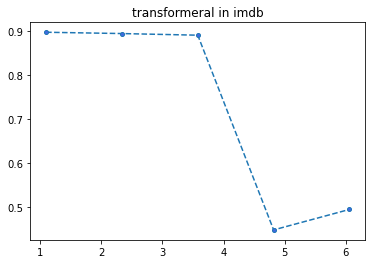

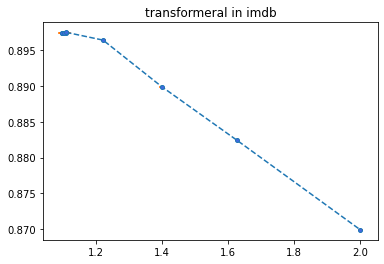

mkdir: cannot create directory ‘ckpt/imdb_lstmal_l5_pad500_fix/’: File exists
mkdir: cannot create directory ‘result/imdb_lstmal_l5_pad500_fix/’: File exists
loading glove vocabs...: 100%|██████| 400000/400000 [00:03<00:00, 109008.07it/s]


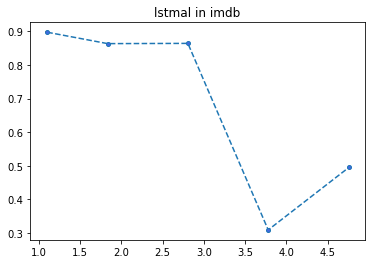

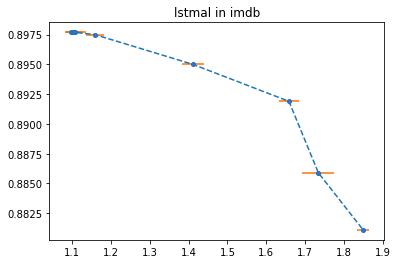

mkdir: cannot create directory ‘ckpt/ag_news_transformeral_l5_pad177_fix/’: File exists
mkdir: cannot create directory ‘result/ag_news_transformeral_l5_pad177_fix/’: File exists
Using custom data configuration default
Reusing dataset ag_news (/home/user/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548)
Using custom data configuration default
Reusing dataset ag_news (/home/user/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548)
Loading cached shuffled indices for dataset at /home/user/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548/cache-094f8568a906f40f.arrow
loading glove vocabs...: 100%|██████| 400000/400000 [00:03<00:00, 110464.76it/s]
Using custom data configuration default
Reusing dataset ag_news (/home/user/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb

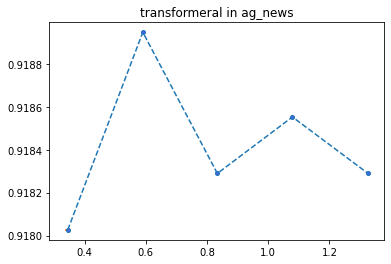

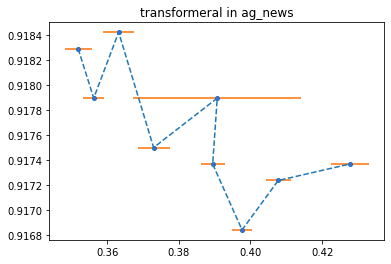

mkdir: cannot create directory ‘ckpt/ag_news_lstmal_l5_pad177_fix/’: File exists
mkdir: cannot create directory ‘result/ag_news_lstmal_l5_pad177_fix/’: File exists
Using custom data configuration default
Reusing dataset ag_news (/home/user/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548)
Using custom data configuration default
Reusing dataset ag_news (/home/user/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548)
Loading cached shuffled indices for dataset at /home/user/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548/cache-094f8568a906f40f.arrow
loading glove vocabs...: 100%|██████| 400000/400000 [00:03<00:00, 111136.90it/s]
Using custom data configuration default
Reusing dataset ag_news (/home/user/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7

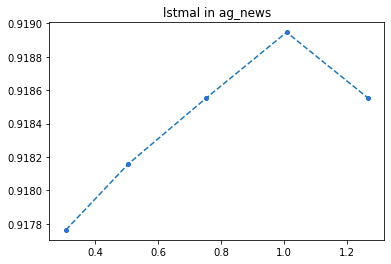

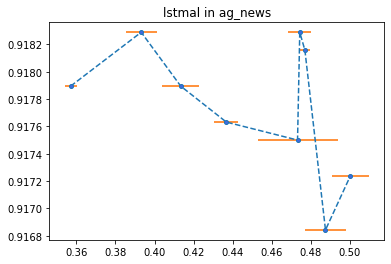

mkdir: cannot create directory ‘ckpt/dbpedia_14_transformeral_l5_pad80_fix/’: File exists
mkdir: cannot create directory ‘result/dbpedia_14_transformeral_l5_pad80_fix/’: File exists
Reusing dataset dbpedia_14 (/home/user/.cache/huggingface/datasets/dbpedia_14/dbpedia_14/2.0.0/01dab9e10d969eadcdbc918be5a09c9190a24caeae33b10eee8f367a1e3f1f0c)
Reusing dataset dbpedia_14 (/home/user/.cache/huggingface/datasets/dbpedia_14/dbpedia_14/2.0.0/01dab9e10d969eadcdbc918be5a09c9190a24caeae33b10eee8f367a1e3f1f0c)
Loading cached shuffled indices for dataset at /home/user/.cache/huggingface/datasets/dbpedia_14/dbpedia_14/2.0.0/01dab9e10d969eadcdbc918be5a09c9190a24caeae33b10eee8f367a1e3f1f0c/cache-68e93457c310e291.arrow
loading glove vocabs...: 100%|██████| 400000/400000 [00:03<00:00, 109144.92it/s]
Reusing dataset dbpedia_14 (/home/user/.cache/huggingface/datasets/dbpedia_14/dbpedia_14/2.0.0/01dab9e10d969eadcdbc918be5a09c9190a24caeae33b10eee8f367a1e3f1f0c)
Reusing dataset dbpedia_14 (/home/user/.cache/

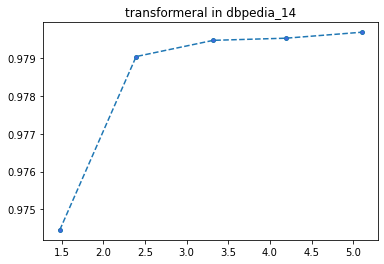

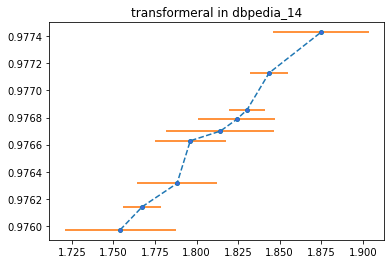

mkdir: cannot create directory ‘ckpt/dbpedia_14_lstmal_l5_pad80_fix/’: File exists
mkdir: cannot create directory ‘result/dbpedia_14_lstmal_l5_pad80_fix/’: File exists
Reusing dataset dbpedia_14 (/home/user/.cache/huggingface/datasets/dbpedia_14/dbpedia_14/2.0.0/01dab9e10d969eadcdbc918be5a09c9190a24caeae33b10eee8f367a1e3f1f0c)
Reusing dataset dbpedia_14 (/home/user/.cache/huggingface/datasets/dbpedia_14/dbpedia_14/2.0.0/01dab9e10d969eadcdbc918be5a09c9190a24caeae33b10eee8f367a1e3f1f0c)
Loading cached shuffled indices for dataset at /home/user/.cache/huggingface/datasets/dbpedia_14/dbpedia_14/2.0.0/01dab9e10d969eadcdbc918be5a09c9190a24caeae33b10eee8f367a1e3f1f0c/cache-68e93457c310e291.arrow
loading glove vocabs...: 100%|██████| 400000/400000 [00:03<00:00, 109528.40it/s]
Reusing dataset dbpedia_14 (/home/user/.cache/huggingface/datasets/dbpedia_14/dbpedia_14/2.0.0/01dab9e10d969eadcdbc918be5a09c9190a24caeae33b10eee8f367a1e3f1f0c)
Reusing dataset dbpedia_14 (/home/user/.cache/huggingface/da

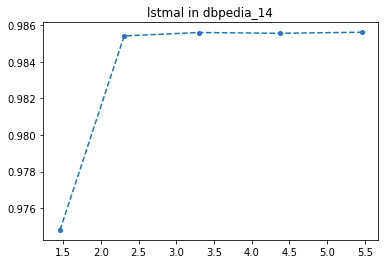

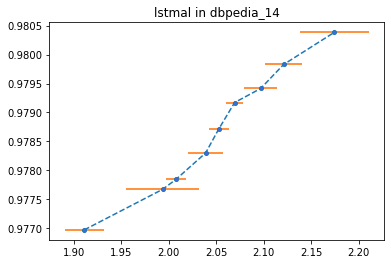

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text  
import pandas as pd
import gc
para_layer = 5
para_thres = 9
columns = ["dataset","model","val_type"]+[f'L{i}_acc' for i in range(para_layer)]+[f't0.{i}_acc' for i in range(1,10)]+[f'L{i}_time' for i in range(para_layer)]+[f't0.{i}_time' for i in range(1,10)]
total_result = pd.DataFrame(columns=columns)

for data,text_len in [
    ("imdb",500),
    ("ag_news",177),
    ("dbpedia_14",80),
]:
    for model in ["transformeral","lstmal"]:    
        gc.collect()
        layer = 5
        epoch = 50
        lr = 0.0001
        save_path = f"ckpt/{data}_{model}_l{layer}_pad{text_len}_fix/"
        out_path = f"result/{data}_{model}_l{layer}_pad{text_len}_fix/"
        log = f"{out_path}/{data}_{model}_l{layer}_inference.log"
        !mkdir {save_path}
        !mkdir {out_path}
        !python3 dis_test_rnn_lbl.py --dataset {data} --model {model} --epoch {epoch} \
        --max-len {text_len} \
        --num-layer {layer}\
        --batch-train 256 --batch-test 512 \
        --lr {lr} --l1-dim 300 --label-emb 128 \
        --lr-schedule plateau \
        --save-dir {save_path} \
        --out-dir {out_path} \
        --task text > {log}
        
        with open(f'{out_path}/test.npy', 'rb') as f:
            y =     np.load(f)
            yerr =  np.load(f)
            x =     np.load(f)
            xerr =  np.load(f)
            plt.title(f"{model} in {data}")
            plt.errorbar(x[-1,:para_layer], y[-1,:para_layer], xerr=xerr[-1,:para_layer], yerr=yerr[-1,:para_layer], marker='o', mfc='royalblue', ecolor='#FF7000', linestyle='--',ms=4,)
            plt.show()
            plt.title(f"{model} in {data}")
            plt.errorbar(x[-1,para_layer:], y[-1,para_layer:], xerr=xerr[-1,para_layer:], yerr=yerr[-1,para_layer:], marker='o', mfc='royalblue', ecolor='#FF7000', linestyle='--',ms=4,)
            plt.show()
            
            for layer,acc in enumerate(y):
                y[layer,layer+1:para_layer] = 0
                yerr[layer,layer+1:para_layer] = 0
                
            
            result = pd.DataFrame(columns=columns)
            avg = pd.concat([pd.DataFrame([[data,model, "avg"]]*para_layer),pd.DataFrame(y*100),pd.DataFrame(x)],axis=1)
            avg.columns = columns
            std = pd.concat([pd.DataFrame([[data,model, "std"]]*para_layer),pd.DataFrame(yerr*100),pd.DataFrame(xerr)],axis=1)
            std.columns = columns
            
            total_result = pd.concat([total_result,avg,std])
            total_result.to_csv("result/_csv/text_lbl.csv", index=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text  
import pandas as pd
data = "imdb"
text_len=500
model = "transformeral"
layer = 5
para_layer = 5
para_thres = 9

out_path = f"result/{data}_{model}_l{layer}_pad{text_len}_fix/"

with open(f'{out_path}/test.npy', 'rb') as f:
    y =     np.load(f)
    yerr =  np.load(f)
    x =     np.load(f)
    xerr =  np.load(f)
    plt.title(f"{model} in {data}")
    plt.errorbar(x[-1,:5], y[-1,:5], xerr=xerr[-1,:5], yerr=yerr[-1,:5], marker='o', mfc='royalblue', ecolor='#FF7000', linestyle='--',ms=4,)
    plt.show()
    plt.title(f"{model} in {data}")
    plt.errorbar(x[-1,5:], y[-1,5:], xerr=xerr[-1,5:], yerr=yerr[-1,5:], marker='o', mfc='royalblue', ecolor='#FF7000', linestyle='--',ms=4,)
    plt.show()
    
    columns = ["dataset","model","val_type"]+[f'L{i}_acc' for i in range(para_layer)]+[f't0.{i}_acc' for i in range(1,10)]+[f'L{i}_time' for i in range(para_layer)]+[f't0.{i}_time' for i in range(1,10)]
    result = pd.DataFrame(columns=columns)
    avg = pd.concat([pd.DataFrame([[data,model, "avg"]]*5),pd.DataFrame(y*100),pd.DataFrame(x)],axis=1)
    avg.columns = columns
    std = pd.concat([pd.DataFrame([[data,model, "std"]]*5),pd.DataFrame(yerr*100),pd.DataFrame(xerr)],axis=1)
    std.columns = columns
    
    print(pd.concat([avg,std]))
    

In [ ]:
avg = pd.concat([pd.DataFrame([[data,model, "avg"]]*5),pd.DataFrame(y),pd.DataFrame(x)],axis=1)

avg

In [ ]:

for layer,acc in enumerate(y):
    acc[layer+1:5] = 0
    print(acc[:]*100)
    